# Notebook zu Blatt 8

In [3]:
# !pip install numpy seaborn

In [4]:
import numpy as np      # um zufällige arrays zu generieren
import time             # zur zeitmessung
import seaborn as sns   # zum plotten

from matplotlib import pyplot as plt

####  1. Implementieren Sie Selection Sort und Quicksort in Python

Anhand des Pivot-Elements werden die Elemente des Arrays in zwei Teile geteilt.
Eine geschickte Wahl des Pivot-Elements kann die Laufzeit somit reduzieren.

Für die Implementation von Quicksort wählen wir als Pivot das erste Element des Arrays.
Dies hat den Vorteil, dasss es wenig Implementierungsaufwand erfordert, jedoch liefert jede
sortierte Liste den Worst-Case, da das Pivot-Element immer das kleinste Element des Arrays ist und wir
somit eine Rekursionstiefe mit einer Länge von n-1 erhalten.

Selection Sort hat immer die gleiche Laufzeit, nämlich (n^2 * n) / 2

In [5]:
# def selectionSort(array, copy=False):
#     if copy:
#         arr = array.copy()
    
#     else:
#         arr = array

#     for i, _ in enumerate(arr):
#         min = i
#         for j in range(i+1, len(arr)):
#             if arr[j] < arr[min]:
#                 min = j
#         arr[i], arr[min] = arr[min], arr[i]
#     return arr

from selectionsort import selectionSort


In [6]:
array = [7,5,8,1] 
selectionSort(array)
print(array) # das sortierte array

[1, 5, 7, 8]


In [7]:
# def quick_sort_builder(array):
#     if len(array) < 2:
#         return array
    
#     pivot = array[0]
#     less = [i for i in array[1:] if i <= pivot]
#     greater = [i for i in array[1:] if i > pivot]
    
#     return quick_sort_builder(less) + [pivot] + quick_sort_builder(greater)


# def quickSort(array):
#     array[:] = quick_sort_builder(array)

from quicksort import quickSort


In [8]:
array = [7,5,8,1] 
quickSort(array)
print(array) # das sortierte array

[1, 5, 7, 8]


#### 4. Testen Sie die Korrektheit Ihrer Implementierungen anhand von verschiedenen Testfällen

In [9]:
import unittest

from test_sort import TestSorting

unittest.main(argv=[''], verbosity=2, exit=False)


test_quick_sort_big_list (unittests.TestSorting) ... ok
test_quick_sort_easy_cases (unittests.TestSorting) ... ok
test_quick_sort_edge_cases (unittests.TestSorting) ... ok
test_quick_sort_random_lists (unittests.TestSorting) ... ok
test_selection_sort_big_list (unittests.TestSorting) ... ok
test_selection_sort_easy_cases (unittests.TestSorting) ... ok
test_selection_sort_edge_cases (unittests.TestSorting) ... ok
test_selection_sort_random_lists (unittests.TestSorting) ... ok

----------------------------------------------------------------------
Ran 8 tests in 20.952s

OK


#### 5. Messen Sie die Laufzeit der beiden Sortieralgorithmen auf Ihrem Rechner.

In [10]:
s_times, q_times = [], []
arrar_sizes =  [10, 100, 500, 1000, 1500, 2000, 2500, 3000, 5000, 7500, 10000] # messung für verschiedenen array-längen
for size in arrar_sizes:
    # ziehe ein zufälliges array
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size) 
    start = time.time()
    # hier sortieren mit selection sort - wie geht das?
    selectionSort(array)
    end = time.time()
    print("selectionSort: ", end-start)
    s_times.append(end-start) # die zeit in sekunden

    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size) 

    start = time.time()
    # hier sortieren mit selection sort - wie geht das?
    quickSort(array)

    end = time.time()
    print("quickSort: ", end-start)
    q_times.append(end-start) # die zeit in sekunden

selectionSort:  5.9604644775390625e-05
quickSort:  5.435943603515625e-05
selectionSort:  0.0034525394439697266
quickSort:  0.00029921531677246094
selectionSort:  0.06352472305297852
quickSort:  0.0017228126525878906
selectionSort:  0.20028281211853027
quickSort:  0.0027849674224853516
selectionSort:  0.46208930015563965
quickSort:  0.004629373550415039
selectionSort:  0.7791056632995605
quickSort:  0.006448030471801758
selectionSort:  1.307478427886963
quickSort:  0.00808095932006836
selectionSort:  1.724874496459961
quickSort:  0.011205434799194336
selectionSort:  5.242950201034546
quickSort:  0.018219470977783203
selectionSort:  12.463862895965576
quickSort:  0.027894973754882812
selectionSort:  20.02626895904541
quickSort:  0.033368587493896484


#### 6. Erstellen Sie einen geeignent Plot, der die Laufzeit der beiden Algorithmen in Abhängigkeit von der Eingabelänge darstellt

Text(0, 0.5, 'dekadisch logarithmische Laufzeit in Sekunden')

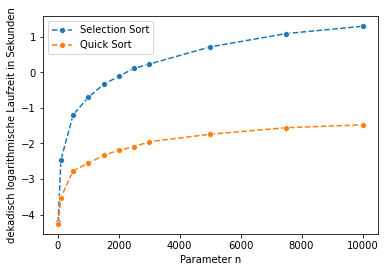

In [11]:
# Hier kommet der Plot!

sns.lineplot(x = arrar_sizes, y = np.log10(s_times), label="Selection Sort", linestyle="dashed", marker="o") 
sns.lineplot(x = arrar_sizes, y = np.log10(q_times), label="Quick Sort", linestyle="dashed", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("dekadisch logarithmische Laufzeit in Sekunden")


#### 7. Erstellen Sie für die beiden Sortieralgorithmen jeweils einen Plot, in dem gemessene Laufzeit durch die entsprechende asymptotische Laufzeitentwicklung approximiert wird.

Text(0, 0.5, 'Laufzeit in Sekunden')

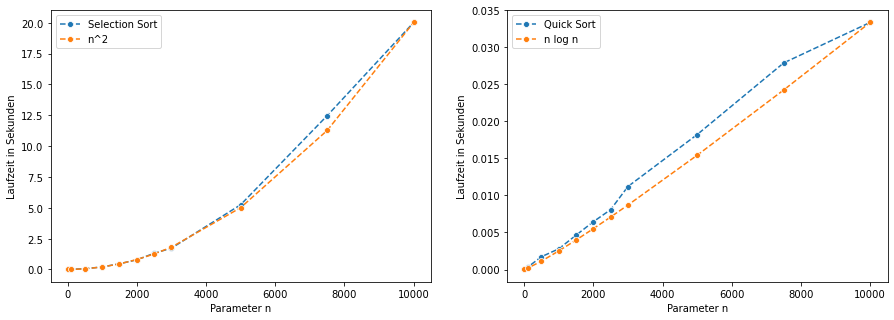

In [12]:
# Hier kommen die Plots!

n_squared = arrar_sizes*np.array(arrar_sizes)
n_log_n = arrar_sizes*np.log(arrar_sizes)

C_s = s_times[-1] / n_squared[-1]
C_q = q_times[-1] / n_log_n[-1]


# Create two plots with s_times and q_times and their respective complexity in seaborn
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(x = arrar_sizes, y = s_times, label="Selection Sort", linestyle="dashed", marker="o", ax=ax1)
sns.lineplot(x = arrar_sizes, y = q_times, label="Quick Sort", linestyle="dashed", marker="o", ax=ax2)
sns.lineplot(x = arrar_sizes, y = C_s*n_squared, label="n^2", linestyle="dashed", marker="o", ax=ax1)
sns.lineplot(x = arrar_sizes, y = C_q*n_log_n, label="n log n", linestyle="dashed", marker="o", ax=ax2)
ax1.set_xlabel("Parameter n")
ax1.set_ylabel("Laufzeit in Sekunden")
# ax1.legend()
ax2.set_xlabel("Parameter n")
ax2.set_ylabel("Laufzeit in Sekunden")
# ax2.legend()




#### 8. Vergleichen Sie die Laufzeit ihrer effizienten Implementierungen mit der Laufzeit der Ihrer Python Implementierung

Da Haskell eine pure funktionale Programmiersprache ist, ist es nicht wirklich möglich, die Laufzeit geschickt zu messen.
Daher haben wir uns entschieden, Haskells ghci mit der Option `:set +s` zu verwenden, um die Laufzeit manuell zu messen.

In [13]:
n_values = [500000, 1000000, 2000000, 2500000, 3000000, 5000000, 7000000, 10000000]
haskell_q_times = [0.79, 1.49, 3.05, 3.77, 4.66, 6.17, 8.54, 12.76]
python_q_times = []

for n in n_values:
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=n) 

    start = time.time()

    quickSort(array)

    end = time.time()
    
    # print array size and time of quicksort
    print(n, end-start)
    python_q_times.append(end-start)

500000 2.729066848754883
1000000 6.121525526046753
2000000 13.974548816680908
2500000 18.837693691253662
3000000 23.011847019195557


Text(0, 0.5, 'Laufzeit in Sekunden')

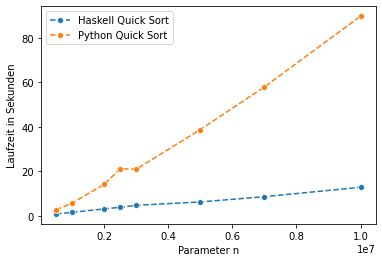

In [ ]:
# haskell_q_times = [0.79, 1.49, 3.05, 3.77, 4.66, 6.17, 8.54, 12.76]

sns.lineplot(x = n_values, y = haskell_q_times, label="Haskell Quick Sort", linestyle="dashed", marker="o") 
sns.lineplot(x = n_values, y = python_q_times, label="Python Quick Sort", linestyle="dashed", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")

#### 9. Vergleichen Sie die Laufzeit ihrer effizienten Implementierungen mit der Laufzeit der nativen sort() Funktion für Listen in Python

In [ ]:
# Hier kommt eure Laufzeitanalyse!
python_native_times = []

for n in n_values:
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=n) 

    start = time.time()

    array.sort()

    end = time.time()
    
    # print array size and time of quicksort
    print(n, end-start)
    python_native_times.append(end-start)


500000 0.052083492279052734
1000000 0.09594869613647461
2000000 0.20221281051635742
2500000 0.24706292152404785
3000000 0.30477118492126465
5000000 0.5114498138427734
7000000 0.732642412185669
10000000 1.0491681098937988


Text(0, 0.5, 'Laufzeit in Sekunden')

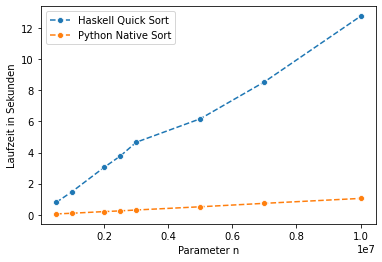

In [ ]:
sns.lineplot(x = n_values, y = haskell_q_times, label="Haskell Quick Sort", linestyle="dashed", marker="o") 
sns.lineplot(x = n_values, y = python_native_times, label="Python Native Sort", linestyle="dashed", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")